### Investment Analysis Assignment

<font color='blue' size = 3> importing required libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

<font color='blue' size = 3>Loading dataframe  </font> <br>
Faced encoding issue so added engine='python' in read_csv function as suggested on upgrad forum


In [3]:
companies = pd.read_csv('companies.csv',engine='python')
rounds2 = pd.read_csv('rounds2.csv',engine='python')

<font color='blue' size = 3> Cheking basic details of Dataframe </font> <br>
Counts , shape , columns , datatype of Dataframe

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [5]:
companies.shape

(66368, 10)

In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Fonbox,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,1/1/2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [8]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [10]:
rounds2.shape

(114949, 6)

In [11]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [12]:
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [13]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [14]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [15]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


<font color='blue' size = 3> Taking unique count of Companies in both dataframe </Font> <br>    

As Permalink is unique column in Companies data and company_permalink unique column in rounds2 data , so taking Unique count of both of them using nunique function

In [16]:
companies['permalink'].nunique()

66368

In [17]:
rounds2['company_permalink'].nunique()

90247

<font color='blue' size = 3> Checking if all compnies in round2 data is resent in Companies data </font><br>

To compare both column first converting them into upper case


In [18]:
rounds2['company_permalink']= rounds2['company_permalink'].str.upper()

In [19]:
rounds2['company_permalink']

0                                       /ORGANIZATION/-FAME
1                                    /ORGANIZATION/-QOUNTER
2                                    /ORGANIZATION/-QOUNTER
3                       /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                                     /ORGANIZATION/0-6-COM
                                ...                        
114944                            /ORGANIZATION/ZZZZAPP-COM
114945                            /ORGANIZATION/ZZZZAPP-COM
114946                                 /ORGANIZATION/Ã�ERON
114947                               /ORGANIZATION/Ã”ASYS-2
114948    /ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...
Name: company_permalink, Length: 114949, dtype: object

In [20]:
companies['permalink'] = companies['permalink'].str.upper()

In [21]:
companies['permalink']

0                                      /ORGANIZATION/-FAME
1                                   /ORGANIZATION/-QOUNTER
2                      /ORGANIZATION/-THE-ONE-OF-THEM-INC-
3                                    /ORGANIZATION/0-6-COM
4                           /ORGANIZATION/004-TECHNOLOGIES
                               ...                        
66363    /ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...
66364                            /ORGANIZATION/ZZZZAPP-COM
66365                                 /ORGANIZATION/Ã�ERON
66366                               /ORGANIZATION/Ã”ASYS-2
66367    /ORGANIZATION/Ä°NOVATIFF-REKLAM-VE-TANÄ±TÄ±M-H...
Name: permalink, Length: 66368, dtype: object

In [22]:
rounds2['company_permalink'][rounds2['company_permalink'].isin(companies['permalink'])].nunique()

66368

<font color='blue' size = 3>As all the company values are present in companies data , there are no extra companies in rounds data </font>

<font color='blue' size = 3> Merging Dataframes </font>

<b>As found out in both data frame Company permalink is unique idetifier so Joinig on that key

In [23]:
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on = 'permalink',how = 'inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007


In [24]:
master_frame.shape

(114949, 16)

<font color='blue' size = 3>As Master frame conatints 114949 rows , merege of two dataset was succsfull and no data drop observered </font>

In [25]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

## Data Cleansing 
<font color='blue' size = 3> 
As we can see there are duplicate company permalink column after merging we can remove, also our analysis focused on Companies, amount , sector and countries so we can remove some of unwanted columns as well </font>

In [26]:
master_frame =  master_frame.drop(['company_permalink','homepage_url','founded_at'], axis=1) 

In [27]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funding_round_permalink  114949 non-null  object 
 1   funding_round_type       114949 non-null  object 
 2   funding_round_code       31140 non-null   object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   permalink                114949 non-null  object 
 6   name                     114948 non-null  object 
 7   category_list            111539 non-null  object 
 8   status                   114949 non-null  object 
 9   country_code             106271 non-null  object 
 10  state_code               104003 non-null  object 
 11  region                   104782 non-null  object 
 12  city                     104785 non-null  object 
dtypes: float64(1), object(12)
memory usage: 12.3+ MB


<font color='blue' size = 3> Checking All the Null values in all columns </font>

In [28]:
round((master_frame.isnull().sum()/ len(master_frame))*100)

funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         73.0
funded_at                   0.0
raised_amount_usd          17.0
permalink                   0.0
name                        0.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
dtype: float64

<font color='blue' size = 3>funding_round_code has significant amount of data missing 73%. There is no other way to popualte this data and This column is not used in analysis, so we can drop this column as well

In [29]:
master_frame =  master_frame.drop(['funding_round_code'], axis=1) 

In [30]:
round((master_frame.isnull().sum()/ len(master_frame))*100)

funding_round_permalink     0.0
funding_round_type          0.0
funded_at                   0.0
raised_amount_usd          17.0
permalink                   0.0
name                        0.0
category_list               3.0
status                      0.0
country_code                8.0
state_code                 10.0
region                      9.0
city                        9.0
dtype: float64

<font color='blue' size = 3> Still raised_amount_usd has 17% values missing as raised_amount_usd is very important column is very imporatant in all the analsyis we cannot keep them null. This will impact our analysis. There are two way we can handle this , we can add missing values as most representative value (Medain in this case as data has outlliers). or we can drop rows having missing values . I think dropping missing values is better way as imputing this may lead to wrong analysis. 

In [31]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [32]:
 master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

In [33]:
master_frame.shape

(94959, 12)

<font color='blue' size = 3> This has filtered almost 19K rows , now lets see Missing values again

In [34]:
master_frame.isnull().sum()

funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
category_list              1044
status                        0
country_code               5851
state_code                 7604
region                     7048
city                       7045
dtype: int64

<font color='blue' size = 3> Now next column is Country code which is important column for anaylis and 8% values missing.
    We can analyse the country code column

In [35]:
round((master_frame['country_code'].value_counts()/ len(master_frame))*100)

USA    65.0
GBR     5.0
CAN     3.0
CHN     2.0
IND     2.0
       ... 
MNE     0.0
OMN     0.0
SOM     0.0
HND     0.0
TGO     0.0
Name: country_code, Length: 134, dtype: float64

In [36]:
master_frame[['state_code','city']][master_frame['country_code'].isnull()]

,state_code,city
3,NaN,NaN
32,NaN,NaN
66,NaN,NaN
95,NaN,NaN
96,NaN,NaN
...,...,...
114752,NaN,NaN
114835,NaN,NaN
114836,NaN,NaN
114849,NaN,NaN


In [37]:
round((master_frame['raised_amount_usd'][master_frame['country_code'].isnull()].sum()/master_frame['raised_amount_usd'].sum())*100)

6.0

<font color='blue' size = 3> As checked above we cant even popualte countries data using state code,city column as both column are null where country is null.USA is most occuring value for country code 65% data has USA county code.We can either populate Nulls with USA or remove null rows. I am taking route of removing it as it less rows and total amount for this rows is 6% of total amount 

In [38]:
 master_frame = master_frame[~master_frame['country_code'].isnull()]

In [39]:
master_frame.shape

(89108, 12)

In [40]:
round((master_frame.isnull().sum()/ len(master_frame))*100)

funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              1.0
status                     0.0
country_code               0.0
state_code                 2.0
region                     1.0
city                       1.0
dtype: float64

<font color='blue' size = 3> as after cleaning most of the column have very less nulls we can proceed Further now 

## Funding Type Analysis

In [41]:
master_frame['funding_round_type'].str.strip().unique

<bound method Series.unique of 0                  venture
2                     seed
4                  venture
6              undisclosed
7                     seed
                ...       
114942                seed
114943                seed
114944    convertible_note
114945                seed
114947                seed
Name: funding_round_type, Length: 89108, dtype: object>

<font color='blue' size = 3>  As per Spark fund, only 4 Fund type angel,venture,seed,private_equity are important so filtering out rest of the types.

In [42]:
master_frame = master_frame[master_frame['funding_round_type'].str.contains('angel|venture|seed|private_equity') ]

master_frame.shape

(75606, 12)

In [43]:
master_frame['funding_round_type'].value_counts()

venture           48111
seed              21233
angel              4427
private_equity     1835
Name: funding_round_type, dtype: int64

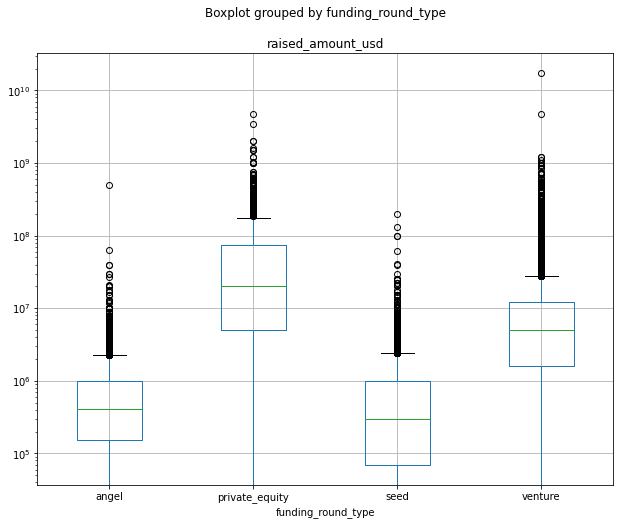

In [44]:
master_frame.boxplot(column='raised_amount_usd',by='funding_round_type',figsize=(10, 8))
plt.yscale('log')## using log as linear graph is not showing readable scales
plt.show()

<b> as we plot this data we can see  there are many outliers in this data, which will affect Mean calculation so we will calulcate median to see most representatve value.

In [45]:
master_frame.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.mean, np.median,np.sum]})

raised_amount_usd                          
                                mean      median           sum
funding_round_type                                            
angel                   9.685599e+05    410737.0  4.287815e+09
private_equity          7.361856e+07  20000000.0  1.350901e+11
seed                    7.481045e+05    300000.0  1.588450e+10
venture                 1.173578e+07   5000000.0  5.646201e+11

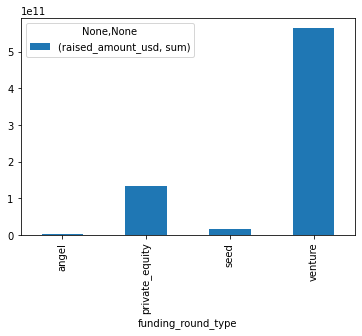

In [46]:
master_frame.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.sum]}).plot(kind = 'bar')
plt.show()

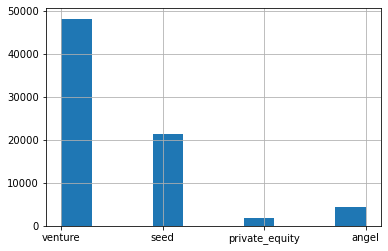

In [47]:
master_frame['funding_round_type'].hist()
plt.show()

<font color='blue' size = 3> As per analysis till now as spark Funds wants to invest where others are investing and they have cap of 5 to 15 MD cap per round.
Venture investment type is most suitable for them as it has avg value of 5M raised and most number and amount of invement are made in Venture type. For Further analysis focusing onlny on Venture funds and removing all others.

In [48]:
master_frame = master_frame[master_frame['funding_round_type']=='venture']
master_frame.shape

(48111, 12)

### Country Analysis
<font color='blue' size = 3> Creating New data frame for top 9 countries using groupby 

In [164]:
top9 = master_frame.groupby('country_code')[['country_code','raised_amount_usd']].sum().reset_index()
top9.head(9)

,country_code,raised_amount_usd
0,ARE,3.426175e+08
1,ARG,3.143388e+08
2,ARM,2.651750e+07
3,AUS,1.322935e+09
4,AUT,6.309550e+08
5,BAH,8.900000e+06
6,BEL,1.070542e+09
7,BGD,7.002000e+06
8,BGR,1.130000e+07


In [165]:
top9 = top9.sort_values(by= 'raised_amount_usd',ascending=False).head(9)
top9.head(10)

,country_code,raised_amount_usd
94,USA,3.956756e+11
15,CHN,3.983218e+10
29,GBR,2.017706e+10
39,IND,1.439186e+10
12,CAN,9.583332e+09
28,FRA,7.259537e+09
42,ISR,6.907515e+09
21,DEU,6.346960e+09
45,JPN,3.363677e+09


<font color='blue' size = 3> Spark Fund wants to invest in english speaking countries with heavy/top investment in past, USA/GBR/IND are 3 english speaking countries which has most amount invesment done. We are excluding China as english is not officail language there.

## Sector analysis

<font color='blue' size = 3>  Extracting Primary sector from Category list column based on business rule that the first string before the vertical bar will be considered the primary sector

In [51]:
master_frame['category_list'] = master_frame['category_list'].astype(str)

In [52]:
master_frame['prmy_sector'] = master_frame['category_list'].apply(lambda  x : x.split("|")[0].strip()) 

In [53]:
master_frame['prmy_sector'].value_counts()

Biotechnology          6794
Software               4102
Advertising            2215
Health Care            1804
Enterprise Software    1752
                       ... 
Custom Retail             1
Financial Exchanges       1
Water Purification        1
English-Speaking          1
Presentations             1
Name: prmy_sector, Length: 604, dtype: int64

<font color='blue' size = 3>  importing mapping file

In [54]:
sec_mapping = pd.read_csv('mapping.csv')
sec_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [55]:
sec_mapping.shape

(688, 10)

In [56]:
sec_mapping[sec_mapping['category_list'].str.contains('0', na=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


In [57]:
len(sec_mapping['category_list'][sec_mapping['category_list'].str.contains('0', na=False)])

53

<font color='blue' size = 3>  There are 53 values in category list have 0 in palce of 'na' text, as this column will be used to join master data frame. Replacing that with correct text so daat wont be dropped.

In [58]:
import re
sec_mapping['category_list'] = sec_mapping['category_list'].astype(str)
sec_mapping['category_list'] = sec_mapping['category_list'].apply(lambda x: re.sub(r'0', 'na', x) )

In [59]:
len(sec_mapping['category_list'][sec_mapping['category_list'].str.contains('0', na=False)])

0

##### Get Primary sector from column to rows 
<font color='blue' size = 3> Shape of the this file is bit different , we can not staright forwad join this master data frame.
    i found one code online <font color='red' size = 3> sec_mapping['main_sector']=sec_mapping.apply(lambda x: x.index[x.astype(bool)][1], 1)  </Font> but in session with Reena mam, she suggested diffrent method (melt) which is more useful and would create less columns so using that

In [60]:
sec_mapping = pd.melt(sec_mapping, id_vars=['category_list'], var_name='main_sector')
sec_mapping = sec_mapping[sec_mapping['value']==1]
sec_mapping = sec_mapping.drop('value',1)
sec_mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [61]:
sec_mapping.shape

(688, 2)

<font color='blue' size = 3>  Merging mapping sheet with new main data set before that converting both the column to upper

In [62]:
sec_mapping['category_list']= sec_mapping['category_list'].str.upper()
master_frame['prmy_sector'] = master_frame['prmy_sector'].str.upper()

In [63]:
master_frame = pd.merge(master_frame,sec_mapping[['category_list','main_sector']],left_on='prmy_sector',right_on = 'category_list',how='inner')
master_frame.shape

(48091, 15)

In [64]:
master_frame.columns

Index(['funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'permalink', 'name', 'category_list_x', 'status',
       'country_code', 'state_code', 'region', 'city', 'prmy_sector',
       'category_list_y', 'main_sector'],
      dtype='object')

In [65]:
sec_mapping[sec_mapping['category_list'].isin(['ENGLISH-SPEAKING', 'ENTERPRISE HARDWARE']) ]

,category_list,main_sector


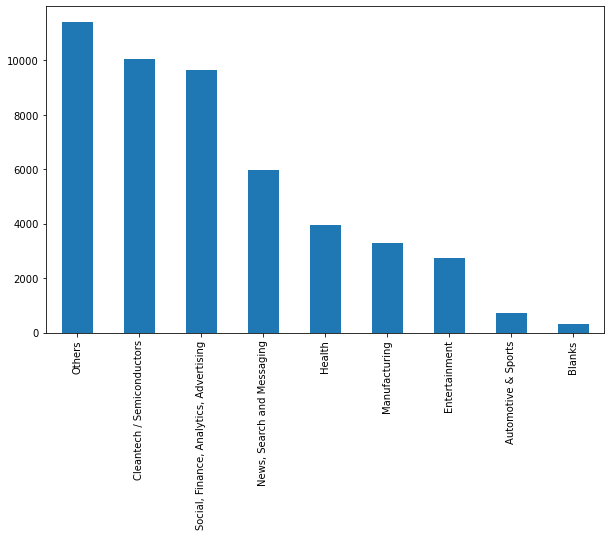

In [182]:
master_frame['main_sector'].value_counts().plot(kind = 'bar',figsize = (10,6))
plt.show()

<font color='blue' size = 3> There are 20 categories in master data frame which are not avaible in mapping data. those got dropped in join as we used inner join

<font color='blue' size = 3>  Creating 3 dataframes based on analysis Funding type = Venture , Countries </font> 

#### 1.USA and Invesment amount between 5M to 15M 
   

In [66]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].astype(int)

In [67]:
D1 = master_frame[( master_frame['country_code'] == 'USA' )& ( master_frame['raised_amount_usd'] >= 5000000 ) & (master_frame['raised_amount_usd'] <= 15000000) ]
D1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,prmy_sector,category_list_y,main_sector
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,Media,operating,USA,CA,Los Angeles,Los Angeles,MEDIA,MEDIA,Entertainment
16,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000,/ORGANIZATION/CHEFS-FEED,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,MEDIA,MEDIA,Entertainment
24,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,Media|News|Publishing,acquired,USA,NY,New York City,New York,MEDIA,MEDIA,Entertainment
25,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,Media|News|Publishing,acquired,USA,NY,New York City,New York,MEDIA,MEDIA,Entertainment
33,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000,/ORGANIZATION/MATCHMINE,MatchMine,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,MEDIA,MEDIA,Entertainment


#### 2.GBR and Invesment amount between 5M to 15M 

In [68]:
D2 = master_frame[( master_frame['country_code'] == 'GBR' )& ( master_frame['raised_amount_usd'] >= 5000000.0 ) & (master_frame['raised_amount_usd'] <= 15000000.0) ]
D2.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,prmy_sector,category_list_y,main_sector
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,MEDIA,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,MEDIA,Entertainment
133,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,11-03-2014,10000000,/ORGANIZATION/AZIMO,Azimo,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,CURATED WEB,CURATED WEB,"News, Search and Messaging"
144,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,13-05-2014,7000000,/ORGANIZATION/BASEKIT-PLATFORM,BaseKit,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,CURATED WEB,CURATED WEB,"News, Search and Messaging"
145,/funding-round/9ceb098a822fb971db490b23c1067336,venture,03-02-2014,6818631,/ORGANIZATION/BASEKIT-PLATFORM,BaseKit,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,CURATED WEB,CURATED WEB,"News, Search and Messaging"


#### 3.IND and Invesment amount between 5M to 15M 

In [69]:
D3 = master_frame[( master_frame['country_code'] == 'IND' )& ( master_frame['raised_amount_usd'] >= 5000000.0 ) & (master_frame['raised_amount_usd'] <= 15000000.0) ]
D3.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,prmy_sector,category_list_y,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000,/ORGANIZATION/-FAME,#fame,Media,operating,IND,16,Mumbai,Mumbai,MEDIA,MEDIA,Entertainment
135,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000,/ORGANIZATION/BABAJOB,Babajob,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,CURATED WEB,CURATED WEB,"News, Search and Messaging"
159,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000,/ORGANIZATION/BHARAT-MATRIMONY,Bharat Matrimony,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,CURATED WEB,CURATED WEB,"News, Search and Messaging"
190,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5000000,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,CURATED WEB,CURATED WEB,"News, Search and Messaging"
192,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,CURATED WEB,CURATED WEB,"News, Search and Messaging"


In [70]:
print(D1.shape)
print(D2.shape)
print(D3.shape)

(12149, 15)
(628, 15)
(330, 15)


In [71]:
round(D1['raised_amount_usd'].sum()/1000000)

108522.0

In [72]:
D1.groupby(by = ['main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values(('count'),ascending = False)

,count,sum
main_sector,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2350,2.163343e+10
"News, Search and Messaging",1583,1.397157e+10
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
Entertainment,591,5.099198e+09
Automotive & Sports,167,1.454104e+09
Blanks,86,7.647633e+08


In [73]:
D1[D1['main_sector'] == 'Others' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector name                         
Others      Virtustream          64300000
            Capella Photonics    54968051
            AirTight Networks    54201907
            deCarta              52100000
            Black Duck Software  51000000
...                                   ...
            X-1                   5000000
            Peatix                5000000
            CashWorks             5000000
            SynapticMash          5000000
            CX                    5000000

[2049 rows x 1 columns]

In [74]:
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector                             name                                     
Social, Finance, Analytics, Advertising SST Inc. (Formerly ShotSpotter)  67933006
                                        Demandbase                       63000000
                                        Intacct                          61800000
                                        NetBase Solutions                60600000
                                        Lotame                           59700000
...                                                                           ...
                                        Bulldog Solutions                 5000000
                                        Fundly                            5000000
                                        Thredhq                           5000000
                                        Xylo, Inc                         5000000
                                        Convo                             5000000

[1847 rows x 1 columns]

In [75]:
round(D2['raised_amount_usd'].sum()/1000000)

5437.0

In [76]:
D2.groupby(by = ['main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values(('count'),ascending = False)

,count,sum
main_sector,,
Others,147,1283624289
"Social, Finance, Analytics, Advertising",133,1089404014
Cleantech / Semiconductors,130,1163990056
"News, Search and Messaging",73,615746235
Entertainment,56,482784687
Manufacturing,42,361940335
Health,24,214537510
Automotive & Sports,16,167051565
Blanks,7,57764848


In [77]:
D2[D2['main_sector'] == 'Others' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector name                             
Others      Electric Cloud           37000000
            SenSage                  36250000
            Enigmatec                32500000
            SilverRail Technologies  29000000
            OpenCloud                27972766
...                                       ...
            Bacula Systems            5000000
            Vector Watch              5000000
            The Filter                5000000
            BullGuard                 5000000
            PhotoBox                  5000000

[120 rows x 1 columns]

In [78]:
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector                             name                           
Social, Finance, Analytics, Advertising Celltick Technologies  37500000
                                        myThings               34000000
                                        Zopa                   32900000
                                        VisualDNA              28550000
                                        MarketInvoice          25553007
...                                                                 ...
                                        The Fizzback Group      5000000
                                        Tamoco                  5000000
                                        Rangespan               5000000
                                        MOO.COM                 5000000
                                        DueDil                  5000000

[104 rows x 1 columns]

In [79]:
round(D3['raised_amount_usd'].sum()/1000000)

2977.0

In [80]:
D3.groupby(by = ['main_sector'])['raised_amount_usd'].agg(['count', 'sum']).sort_values(('count'),ascending = False)

,count,sum
main_sector,,
Others,110,1013409507
"Social, Finance, Analytics, Advertising",60,550549550
"News, Search and Messaging",52,433834545
Entertainment,33,280830000
Manufacturing,21,200900000
Cleantech / Semiconductors,20,165380000
Health,19,167740000
Automotive & Sports,13,136900000
Blanks,2,27000000


In [81]:
D3[D3['main_sector'] == 'Others' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector name                       
Others      FirstCry.com       39000000
            Myntra             38000000
            CommonFloor        32900000
            Pepperfry.com      28000000
            ItzCash Card Ltd.  25000000
...                                 ...
            Liases Foras        5000000
            Ameyo               5000000
            TastyKhana          5000000
            Parcelled.in        5000000
            Vedantu             5000000

[88 rows x 1 columns]

In [82]:
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising' ].groupby(by = ['main_sector','name'])['raised_amount_usd'].agg(['sum']).sort_values(('sum'),ascending = False)

sum
main_sector                             name                                                    
Social, Finance, Analytics, Advertising Manthan Systems                                 50700000
                                        Komli Media                                     28000000
                                        ShopClues.com                                   25000000
                                        inTarvo                                         21900000
                                        Grameen Financial Services                      21556050
                                        BankBazaar.com                                  19000000
                                        Microland                                       18300000
                                        Eka Software Solutions                          16000000
                                        Qyuki                                           15400000
                                        Financial Information Network & Operations Pvt  15000000
                                        ApnaPaisa                                       15000000
                                        Shiram Credit                                   15000000
                                        TravelGuru                                      15000000
                                        Capital Float                                   13000000
                                        yepme.com                                       12700000
                                        Coverfox Insurance                              12000000
                                        FundsIndia                                      11000000
                                        Emergent Ventures India                         10040000
                                        Network18                                       10000000
                                        Excellence4u                                    10000000
                                        Lendingkart                                     10000000
                                        LogiNext Solutions                              10000000
                                        Unicommerce eSolutions Pvt. Ltd.                10000000
                                        Razorpay                                         9000000
                                        Industrybuying                                   9000000
                                        Vizury                                           9000000
                                        Fusion Microfinance                              8300000
                                        Prizm Payment Services                           8000000
                                        Shubham Housing Development Finance Company      8000000
                                        Spire Technologies                               8000000
                                        Epiance                                          7500000
                                        IndiaIdeas                                       7500000
                                        CRMNEXT                                          7003500
                                        Neogrowth                                        7000000
                                        Minglebox                                        7000000
                                        A LITTLE WORLD                                   6410000
                                        Furlenco                                         6000000
                                        Daksh Infosoft                                   6000000
                                        Agile                                            5740000
                                        Eko India Financial Services                     5500000
                   

<font color='blue' size = 3> By looking at country and sector wies analysis,  <br>
<font color='Red' size = 3>
    <Br>
    Countires <Br>
    <Br>
    USA<Br>
    UK<Br>
    India<Br>  </font>
 <font color='Black' size = 3>
     <Br>
    Sectors<Br>
     <Br>
    Others  <br>
    Social, Finance, Analytics, Advertising  <br>
    Cleantech / Semiconductors <br>
    News, Search and Messaging <br>
 </font> <Br> are main sectore where most of the investment are made in past. </font>

## Plots

In [83]:
# Creating new column to draw plot, converting dollar in multiple of 100000 $
rounds2['raised_amount_usd_in_M']=round(rounds2['raised_amount_usd']/100000)

<font color='blue' size = 3> Creating new Datframe to plot graph grouping of Fund amount by Funding type

In [84]:
fund_type = rounds2[rounds2['funding_round_type'].str.contains('angel|venture|seed|private_equity') ].groupby(by = ['funding_round_type'])['raised_amount_usd_in_M'].agg(['median']).reset_index()
fund_type

,funding_round_type,median
0,angel,4.0
1,private_equity,200.0
2,seed,3.0
3,venture,50.0


### The representative amount of investment

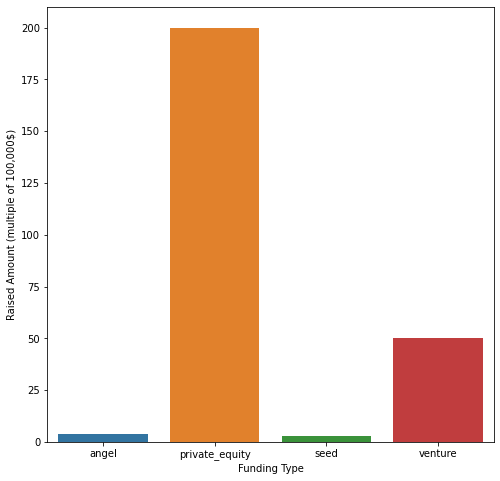

In [85]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="funding_round_type", y="median", data=fund_type)
ax.set(ylabel='Raised Amount (multiple of 100,000$)', xlabel='Funding Type')
plt.show()

### As per spark fund requirement (5M To 15M) Venture Funding type is suitable for them.

<font color='blue' size = 3> Top 9 countries against the total amount of investments of funding type FT

In [161]:
top9['raised_amount_usd'] = round(top9['raised_amount_usd']/100000)
top9

,country_code,raised_amount_usd
94,USA,42.0
15,CHN,4.0
29,GBR,2.0
39,IND,1.0
12,CAN,1.0
28,FRA,1.0
42,ISR,1.0
21,DEU,1.0
45,JPN,0.0


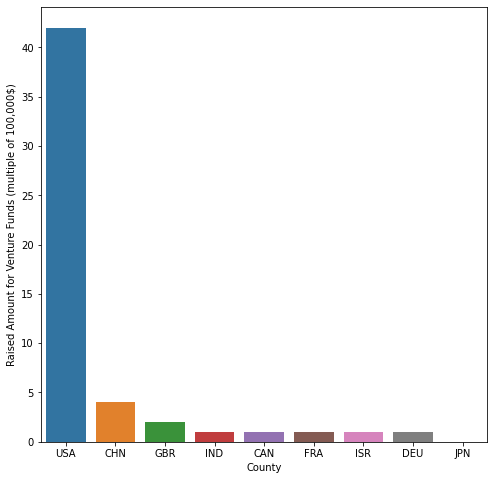

In [162]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="country_code", y="raised_amount_usd", data=top9)
ax.set(ylabel='Raised Amount for Venture Funds (multiple of 100,000$)', xlabel='County')
plt.show()

### Top 3 heavily invested countries where English is official language USA/UK/India

<font color='blue' size = 3> Preparing data for last graph Top 3 sectors for top 3 Countries

In [89]:
D1 = D1[D1['main_sector'].str.contains('Others|Social, Finance, Analytics, Advertising|Cleantech / Semiconductors') ]
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main_sector, dtype: int64

In [90]:
D2 = D2[D2['main_sector'].str.contains('Others|Social, Finance, Analytics, Advertising|Cleantech / Semiconductors') ]
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main_sector, dtype: int64

In [91]:
D3 = D3[D3['main_sector'].str.contains('Others|Social, Finance, Analytics, Advertising|News, Search and Messaging') ]
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

In [138]:
#concating 3 dataframe into 1
D4 = pd.concat([D1, D2,D3])
D4.shape

(8646, 15)

In [139]:
D4['raised_amount_usd'] = round(D4['raised_amount_usd']/100000)

In [159]:
D5 = D4.groupby(by = ['country_code','main_sector'])['raised_amount_usd'].agg(['count']).sort_values(('count'),ascending = False).reset_index()
D5.head(10)

,country_code,main_sector,count
0,USA,Others,2950
1,USA,"Social, Finance, Analytics, Advertising",2714
2,USA,Cleantech / Semiconductors,2350
3,GBR,Others,147
4,GBR,"Social, Finance, Analytics, Advertising",133
5,GBR,Cleantech / Semiconductors,130
6,IND,Others,110
7,IND,"Social, Finance, Analytics, Advertising",60
8,IND,"News, Search and Messaging",52


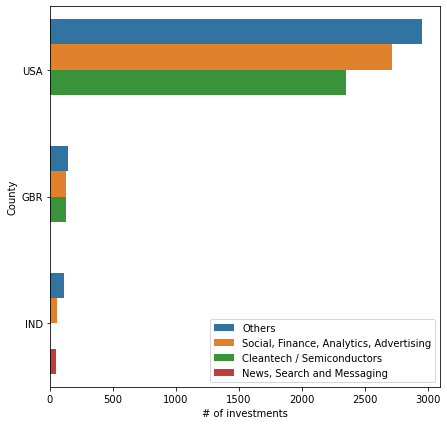

In [160]:
plt.figure(figsize=(7,7))
ax = sns.barplot(y="country_code", x="count", hue="main_sector", data=D5)
ax.set(xlabel='# of investments', ylabel='County')
plt.legend(loc=4)
plt.show()